# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [4]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  1., 10., ..., 10.,  9.,  0.],
       [ 0.,  0., 15., ...,  6.,  2.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]]), 'target': array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 

In [6]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(["red", "blue", "green"]), int(max(y) + 1))))
print(colors)
print(colors[[1,0,2]])

['red' 'blue' 'green']
['blue' 'red' 'green']


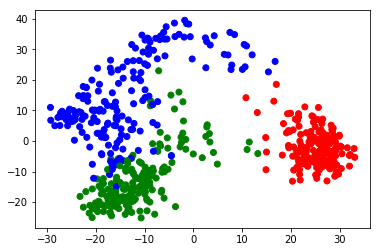

In [39]:
new_X = pca.transform(X)
color = ["red", "blue", "green"]
plt.scatter(new_X[:, 0], new_X[:, 1], color = colors[y])

In [53]:
pca1 = decomposition.PCA(n_components=3)
pca1.fit(X)
new_X2 = pca1.transform(X)
print(new_X2)

[[ 28.47993992  -3.43359359   1.03184835]
 [-22.59666568  17.80122274   6.11085609]
 [ -8.83188035  11.46680509   2.01624685]
 ...
 [-22.05029473 -16.58404599  -5.73396932]
 [-16.44102253 -17.48311967  -3.95362923]
 [ 28.5723742    1.03814293   5.45381185]]


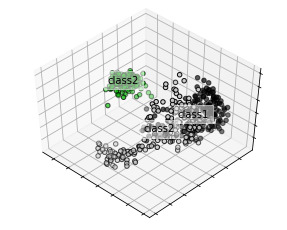

In [61]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('class1', 0), ('class2', 1), ('class2', 2)]:
    ax.text3D(new_X2[y == label, 0].mean(),
              new_X2[y == label, 1].mean() + 1.5,
              new_X2[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float) # 確認此行Error原因
ax.scatter(new_X2[:, 0], new_X2[:, 1], new_X2[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()